1 connected components


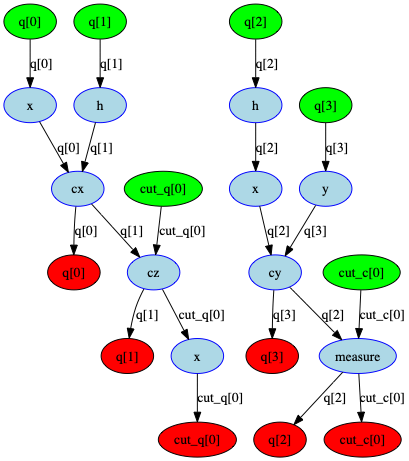

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import *
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.tools.visualization import dag_drawer
from qiskit.extensions.standard import CHGate, HGate, CnotGate, CyGate, CzGate
from qiskit.circuit import Measure
from qiskit.circuit.quantumregister import QuantumRegister
from qiskit.circuit.classicalregister import ClassicalRegister
import itertools
import networkx as nx

q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = QuantumCircuit(q)
circ.h([q[2],q[1]])
circ.x([q[2],q[0]])
circ.y(q[3])
circ.cx(q[0], q[1])
circ.cy(q[2], q[3])
circ.cz(q[1], q[2])
circ.x(q[2])
# circ.barrier()
# circ.measure(q,c)
circ.draw()

dag = circuit_to_dag(circ)
print('%d connected components' % circ.num_connected_components())
dag_drawer(dag)

# cut an edge
for node in dag.op_nodes():
    if node.name == 'cy':
        source_node = node
    if node.name == 'cz':
        dest_node = node
dag.insert_measure(op=Measure(),qarg=q[2],source_node=source_node, dest_node=dest_node)
dag_drawer(dag)

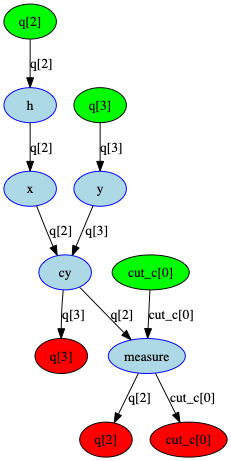

In [12]:
# circ = dag_to_circuit(dag)
# print('%d connected components' % circ.num_connected_components())
# circ.draw()

G = dag.to_networkx()
sub_graphs = [G.subgraph(c) for c in sorted(nx.weakly_connected_components(G),key=len, reverse=True)]
dag_drawer(sub_graphs[1])